
Sample Sales Data, Order Info, Sales, Customer, Shipping, etc., 
    
Used for Segmentation, Customer Analytics, Clustering and More. 

Inspired for retail analytics. 

This was originally used for Pentaho DI Kettle, But I found the set could be useful for Sales Simulation training.


__Preprocessing for analysis__


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('sales_data_sample.csv', encoding = 'unicode_escape')
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [2]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [3]:
data.shape

(2823, 25)

In [4]:
data.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [5]:
# convert all column headers to lower case
data.columns = map(str.lower, data.columns)

In [6]:
# convert the orderdate column to datatime format
data['orderdate']=pd.to_datetime(data.orderdate)
data.head(1)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,10107,30,95.7,2,2871.0,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small


In [7]:
# create new column for unique number of each rows
data['orderid']=data.ordernumber.map(str) + data.orderlinenumber.map(str)

In [8]:
columns=[]
for i in range(len(data.columns)):
    columns.append(data.columns[i])
columns

['ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize',
 'orderid']

In [9]:
# change order of the column orderid at the begin of our sales dataframe
data = data[['orderid',
 'ordernumber',
 'quantityordered',
 'priceeach',
 'orderlinenumber',
 'sales',
 'orderdate',
 'status',
 'qtr_id',
 'month_id',
 'year_id',
 'productline',
 'msrp',
 'productcode',
 'customername',
 'phone',
 'addressline1',
 'addressline2',
 'city',
 'state',
 'postalcode',
 'country',
 'territory',
 'contactlastname',
 'contactfirstname',
 'dealsize']]
data.head()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,101072,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,101215,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,101342,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,101456,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,1015914,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
data.dtypes

orderid                     object
ordernumber                  int64
quantityordered              int64
priceeach                  float64
orderlinenumber              int64
sales                      float64
orderdate           datetime64[ns]
status                      object
qtr_id                       int64
month_id                     int64
year_id                      int64
productline                 object
msrp                         int64
productcode                 object
customername                object
phone                       object
addressline1                object
addressline2                object
city                        object
state                       object
postalcode                  object
country                     object
territory                   object
contactlastname             object
contactfirstname            object
dealsize                    object
dtype: object

In [11]:
data.year_id.unique()

array([2003, 2004, 2005], dtype=int64)

In [12]:
a=data.orderlinenumber.unique()

In [13]:
b=a.sort(axis=-1)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

In [14]:
# find sales amount year 2003
data[data.year_id==2003]['sales'].sum()

3516979.54

In [15]:
#find all sales amount year by year
b=data.groupby('year_id').sales.sum()
b

year_id
2003    3516979.54
2004    4724162.60
2005    1791486.71
Name: sales, dtype: float64

In [16]:
#create a tiny dataframe to look this results
df=pd.DataFrame(b,columns=['sales'])
df

,sales
year_id,
2003,3516979.54
2004,4724162.60
2005,1791486.71


In [17]:
df2=data.year_id.value_counts()


In [18]:
table=pd.concat([df,df2],axis=1)
table

,sales,year_id
2003,3516979.54,1000
2004,4724162.60,1345
2005,1791486.71,478


In [19]:
df2=data.groupby('year_id').count()['ordernumber']
df2

year_id
2003    1000
2004    1345
2005     478
Name: ordernumber, dtype: int64

In [20]:
df3=pd.concat([df,df2],axis=1)
df3

,sales,ordernumber
year_id,,
2003,3516979.54,1000
2004,4724162.60,1345
2005,1791486.71,478


In [21]:
data.groupby(['year_id','status']).count()

orderid  ordernumber  quantityordered  priceeach  \
year_id status                                                         
2003    Cancelled        16           16               16         16   
        Resolved          8            8                8          8   
        Shipped         976          976              976        976   
2004    Cancelled        44           44               44         44   
        On Hold           6            6                6          6   
        Resolved          8            8                8          8   
        Shipped        1287         1287             1287       1287   
2005    Disputed         14           14               14         14   
        In Process       41           41               41         41   
        On Hold          38           38               38         38   
        Resolved         31           31               31         31   
        Shipped         354          354              354        354   

                    orderlinenumber  sales  orderdate  qtr_id  month_id  \
year_id status                                                            
2003    Cancelled                16     16         16      16        16   
        Resolved                  8      8          8       8         8   
        Shipped                 976    976        976     976       976   
2004    Cancelled                44     44         44      44        44   
        On Hold                   6      6          6       6         6   
        Resolved                  8      8          8       8         8   
        Shipped                1287   1287       1287    1287      1287   
2005    Disputed                 14     14         14      14        14   
        In Process               41     41         41      41        41   
        On Hold                  38     38         38      38        38   
        Resolved                 31     31         31      31        31   
        Shipped                 354    354        354     354       354   

                    productline  ...  addressline1  addressline2  city  state  \
year_id status                   ...                                            
2003    Cancelled            16  ...            16             0    16      0   
        Resolved              8  ...             8             0     8      0   
        Shipped             976  ...           976            97   976    459   
2004    Cancelled            44  ...            44             0    44     14   
        On Hold               6  ...             6             0     6      0   
        Resolved              8  ...             8             0     8      0   
        Shipped            1287  ...          1287           171  1287    639   
2005    Disputed             14  ...            14             0    14      5   
        In Process           41  ...            41            13    41     17   
        On Hold              38  ...            38             0    38     38   
        Resolved             31  ...            31             0    31     13   
        Shipped             354  ...           354            21   354    152   

                    postalcode  country  territory  contactlastname  \
year_id status                                                        
2003    Cancelled           16       16         16               16   
        Resolved             8        8          8                8   
        Shipped            929      976        594              976   
2004    Cancelled           44       44         30               44   
        On Hold              6        6          6                6   
        Resolved             8        8          8                8   
        Shipped           1271     1287        781             1287   
2005    Disputed            14       14         14               14   
        In Process          41       41         37               41   
        On Hold             38       38     

In [22]:
data.qtr_id.unique()

array([1, 2, 3, 4], dtype=int64)

In [23]:
data.groupby(['year_id','status']).sum()['sales']

year_id  status    
2003     Cancelled       48710.92
         Resolved        28550.59
         Shipped       3439718.03
2004     Cancelled      145776.56
         On Hold         26260.21
         Resolved        24078.61
         Shipped       4528047.22
2005     Disputed        72212.86
         In Process     144729.96
         On Hold        152718.98
         Resolved        98089.08
         Shipped       1323735.83
Name: sales, dtype: float64

In [24]:
# get sum of sales and quantity ordered for each country based on status by using groupby

data.groupby(['country','status'])['quantityordered','sales'].sum().head()

quantityordered      sales
country   status                                
Australia Disputed                164   14378.09
          In Process              532   43971.43
          Shipped                5550  572273.58
Austria   Resolved                288   28550.59
          Shipped                1686  173511.94

In [25]:
# let's filter sales of order date by a particular month
Jan = data['orderdate'].map(lambda x: x.month)==1
data[Jan].head()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
9,1021114,10211,41,100.0,14,4708.44,2004-01-15,Shipped,1,1,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium
26,1010311,10103,26,100.0,11,5404.62,2003-01-29,Shipped,1,1,...,Erling Skakkes gate 78,NaN,Stavern,NaN,4110,Norway,EMEA,Bergulfsen,Jonas,Medium
36,102153,10215,35,100.0,3,6075.30,2004-01-29,Shipped,1,1,...,3675 Furth Circle,NaN,Burbank,CA,94019,USA,NaN,Thompson,Steve,Medium
49,103692,10369,41,100.0,2,4514.92,2005-01-20,Shipped,1,1,...,7825 Douglas Av.,NaN,Brickhaven,MA,58339,USA,NaN,Nelson,Allen,Medium
63,102102,10210,23,100.0,2,3009.09,2004-01-12,Shipped,1,1,...,"Dojima Avanza 4F, 1-6-20 Dojima, Kita-ku",NaN,Osaka,Osaka,530-0003,Japan,Japan,Kentary,Mory,Medium


In [26]:
# get all month from each row
data['orderdate'].map(lambda x: x.month).head()

0     2
1     5
2     7
3     8
4    10
Name: orderdate, dtype: int64

In [27]:
data.orderdate.head()

0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: orderdate, dtype: datetime64[ns]

In [28]:
# filter rows between two dates
start_date = '2004-01-12'
end_date = '2004-12-12'
mask = (data['orderdate'] > start_date) & (data['orderdate'] <= end_date)
data.loc[mask].head()


,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
9,1021114,10211,41,100.0,14,4708.44,2004-01-15,Shipped,1,1,...,"25, rue Lauriston",NaN,Paris,NaN,75016,France,EMEA,Perrier,Dominique,Medium
10,102231,10223,37,100.0,1,3965.66,2004-02-20,Shipped,1,2,...,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,APAC,Ferguson,Peter,Medium
11,102377,10237,23,100.0,7,2333.12,2004-04-05,Shipped,2,4,...,2678 Kingston Rd.,Suite 101,NYC,NY,10022,USA,NaN,Frick,Michael,Small
12,102512,10251,28,100.0,2,3188.64,2004-05-18,Shipped,2,5,...,7476 Moss Rd.,NaN,Newark,NJ,94019,USA,NaN,Brown,William,Medium
13,102632,10263,34,100.0,2,3676.76,2004-06-28,Shipped,2,6,...,25593 South Bay Ln.,NaN,Bridgewater,CT,97562,USA,NaN,King,Julie,Medium


In [29]:
# filter dataframe to pre January - 2005 period
date = '2004-01-01'
mask = (data['orderdate'] < date)
data.loc[mask].head()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,101072,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,101215,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,101342,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,101456,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,1015914,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [30]:
# splitting sales on their status
pd.DataFrame(data.groupby('status').sum()['sales']).sort_values('sales', ascending = False)

,sales
status,
Shipped,9291501.08
Cancelled,194487.48
On Hold,178979.19
Resolved,150718.28
In Process,144729.96
Disputed,72212.86


In [31]:
# table of number of order of each country
pd.DataFrame(data.groupby('country').count()['orderid']).sort_values('orderid', ascending=False)

,orderid
country,
USA,1004
Spain,342
France,314
Australia,185
UK,144
Italy,113
Finland,92
Norway,85
Singapore,79


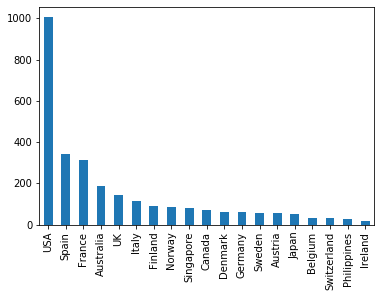

In [32]:
%matplotlib inline
data_counts=data.country.value_counts()
data_counts.plot(kind='bar')

__Handling Missing Values__

In [33]:
data.tail()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
2818,1035015,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,103731,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,103864,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,103971,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small
2822,104149,10414,47,65.52,9,3079.44,2005-05-06,On Hold,2,5,...,8616 Spinnaker Dr.,NaN,Boston,MA,51003,USA,NaN,Yoshido,Juri,Medium


In [34]:
# checking which are NaN (True) using isnull
# creates DataFrame of True's and False's
data.isnull().tail()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
2818,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2819,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2820,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2821,False,False,False,False,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
2822,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False


In [35]:
data.notnull().tail()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
2818,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,True,True,True,True
2819,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,True,True,True,True
2820,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,True,True,True,True
2821,True,True,True,True,True,True,True,True,True,True,...,True,False,True,False,True,True,True,True,True,True
2822,True,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,False,True,True,True


In [36]:
# count number of missing values in each column, it seem to be only address information, so we can keep it for now.
data.isnull().sum()

orderid                0
ordernumber            0
quantityordered        0
priceeach              0
orderlinenumber        0
sales                  0
orderdate              0
status                 0
qtr_id                 0
month_id               0
year_id                0
productline            0
msrp                   0
productcode            0
customername           0
phone                  0
addressline1           0
addressline2        2521
city                   0
state               1486
postalcode            76
country                0
territory           1074
contactlastname        0
contactfirstname       0
dealsize               0
dtype: int64

In [37]:
# this allow us to see the 2521 rows of missing values in the column adressline2 and the others
data[data['addressline2'].isnull()].head()

,orderid,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,...,addressline1,addressline2,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize
0,101072,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,101215,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,101342,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,101456,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,1015914,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


__Sales splits__

In [38]:
pd.pivot_table(data, index=['orderid'], aggfunc={'sales':'sum', 'priceeach':pd.Series.unique, 'quantityordered':'sum'}).head()

,priceeach,quantityordered,sales
orderid,,,
101001,34.47,49,1689.03
101002,67.80,50,3390.00
101003,100.00,30,5151.00
101004,86.51,22,1903.22
101011,100.00,26,3773.38


In [39]:
data['sales']

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
5       3479.76
6       2497.77
7       5512.32
8       2168.54
9       4708.44
10      3965.66
11      2333.12
12      3188.64
13      3676.76
14      4177.35
15      4099.68
16      2597.39
17      4394.38
18      4358.04
19      4396.14
20      7737.93
21      1451.00
22       733.11
23      3207.12
24      2434.56
25      7516.08
26      5404.62
27      7209.11
28      7329.06
29      7374.10
         ...   
2793    4357.50
2794    1367.48
2795    1122.40
2796    2419.62
2797    1419.50
2798    2184.00
2799    2079.04
2800    1724.97
2801    3003.00
2802    1846.42
2803    2009.20
2804    1804.04
2805    2109.66
2806    2682.96
2807    2280.24
2808    1192.56
2809    1506.96
2810    1472.62
2811    1696.82
2812    1693.56
2813    1921.92
2814    2082.85
2815    2227.60
2816    3209.38
2817    4080.72
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: sales, Length: 282

In [40]:
sales = data[data.status == 'Shipped']

In [41]:
def top(feature):
    df = pd.pivot_table(
        data=sales, 
        index=[feature], 
        aggfunc={
            'sales':'sum',
            'ordernumber':pd.Series.nunique,
            'productcode':pd.Series.nunique
            }
        )
       
    df['Pct_total'] = df['sales'].apply(
        lambda x: round(100* (x / sales.sales.sum()),2)
        )
   
    df = df[['sales','Pct_total','ordernumber','productcode']]
    
    df['Avg_orderSize'] = df.apply(
        lambda x: round(x.sales / x.ordernumber,2), axis = 1
        )
    
    return df.sort_values('sales', ascending=False).head(10)

In [42]:
top('productline')

,sales,Pct_total,ordernumber,productcode,Avg_orderSize
productline,,,,,
Classic Cars,3701760.33,39.84,187,37,19795.51
Vintage Cars,1743077.63,18.76,160,24,10894.24
Motorcycles,1129573.83,12.16,70,13,16136.77
Trucks and Buses,1044097.39,11.24,69,11,15131.85
Planes,866466.57,9.33,53,12,16348.43
Ships,591172.76,6.36,58,9,10192.63
Trains,215352.57,2.32,43,3,5008.20


In [43]:
top('country')

,sales,Pct_total,ordernumber,productcode,Avg_orderSize
country,,,,,
USA,3372204.28,36.29,105,109,32116.23
France,1067131.83,11.49,36,108,29642.55
Spain,1044905.31,11.25,32,97,32653.29
Australia,572273.58,6.16,17,80,33663.15
UK,428472.21,4.61,12,75,35706.02
Italy,374674.31,4.03,8,70,46834.29
Finland,329581.91,3.55,9,62,36620.21
Norway,307463.70,3.31,9,73,34162.63
Singapore,288488.41,3.10,9,52,32054.27


In [44]:
top('customername')

,sales,Pct_total,ordernumber,productcode,Avg_orderSize
customername,,,,,
Euro Shopping Channel,741512.50,7.98,22,87,33705.11
Mini Gifts Distributors Ltd.,647596.31,6.97,16,77,40474.77
"Australian Collectors, Co.",200995.41,2.16,5,40,40199.08
Muscle Machine Inc,197736.94,2.13,4,32,49434.23
"Dragon Souveniers, Ltd.",172989.68,1.86,5,37,34597.94
"AV Stores, Co.",157807.81,1.70,3,37,52602.60
"Anna's Decorations, Ltd",153996.13,1.66,4,41,38499.03
Corporate Gift Ideas Co.,149882.50,1.61,4,40,37470.62
Salzburg Collectables,149798.63,1.61,4,36,37449.66


In [45]:
top('dealsize')

,sales,Pct_total,ordernumber,productcode,Avg_orderSize
dealsize,,,,,
Medium,5633596.52,60.63,273,109,20635.88
Small,2477510.26,26.66,267,109,9279.06
Large,1180394.30,12.70,113,41,10445.97


In [46]:
top('productcode')

,sales,Pct_total,ordernumber,productcode,Avg_orderSize
productcode,,,,,
S18_3232,274799.86,2.96,49,1,5608.16
S10_1949,179072.03,1.93,27,1,6632.30
S12_1108,168585.32,1.81,26,1,6484.05
S10_4698,161182.91,1.73,25,1,6447.32
S18_2238,149305.91,1.61,26,1,5742.53
S12_3891,145332.04,1.56,26,1,5589.69
S12_2823,136558.38,1.47,25,1,5462.34
S24_3856,135478.90,1.46,26,1,5210.73
S18_4027,133779.35,1.44,26,1,5145.36


__RFM Analysis__

This is a kind of marketing analysis strategy to detect and estimate the value of customers.

There are based on three dimensions:
- Recency 
- Frequency
- Monetary Value

We used for find the best customers by comparing their R, F, M values for customer segmentation. We also find the predictions which customer are more likely to purchase again. 

We assign a score on a scale from 1-10 to each dimensions to compare customers.

This technique is useful because there is no need statistical analysis and results are understandable even for the people who do not know this analysis too. For this reason, we may use these values to interpret customer directly.

__Customer Recency:__

How recently did the customer purchase?

In [47]:
max_date = data.orderdate.max()

# find recent order date of each customer
data_r = data.groupby(['customername'], as_index = False)['orderdate'].max()
data_r.columns = ['customername', 'lastpurchaseddate']

# find the how much days passed from the last purchased date. 
data_r['recency'] = data_r['lastpurchaseddate'].apply(lambda x: (max_date-x).days)

data_r.drop(columns = 'lastpurchaseddate', axis = 1, inplace = True)
data_r.head()

,customername,recency
0,"AV Stores, Co.",195
1,Alpha Cognac,64
2,Amica Models & Co.,264
3,"Anna's Decorations, Ltd",83
4,Atelier graphique,187


__Customer Frequency and Monetary:__

How often do they purchase?

How much do they spend?

In [48]:
data_fm = pd.pivot_table(data = data, index = ['customername'],
                        aggfunc = {
                            'sales': 'sum',
                            'ordernumber': pd.Series.nunique
                        
                        })
data_fm.rename(columns = {'sales':'monetary', 'ordernumber': 'frequency'}, inplace = True)

data_fm = data_fm.reset_index()
data_fm.head()

,customername,frequency,monetary
0,"AV Stores, Co.",3,157807.81
1,Alpha Cognac,3,70488.44
2,Amica Models & Co.,2,94117.26
3,"Anna's Decorations, Ltd",4,153996.13
4,Atelier graphique,3,24179.96


In [49]:
# Merge to RFM per customer
data_rfm = data_r.merge(data_fm)
data_rfm.head()

,customername,recency,frequency,monetary
0,"AV Stores, Co.",195,3,157807.81
1,Alpha Cognac,64,3,70488.44
2,Amica Models & Co.,264,2,94117.26
3,"Anna's Decorations, Ltd",83,4,153996.13
4,Atelier graphique,187,3,24179.96


In [50]:
data_rfm.frequency.unique()

array([ 3,  2,  4,  5,  1, 26, 17], dtype=int64)

__Customer Distribution__

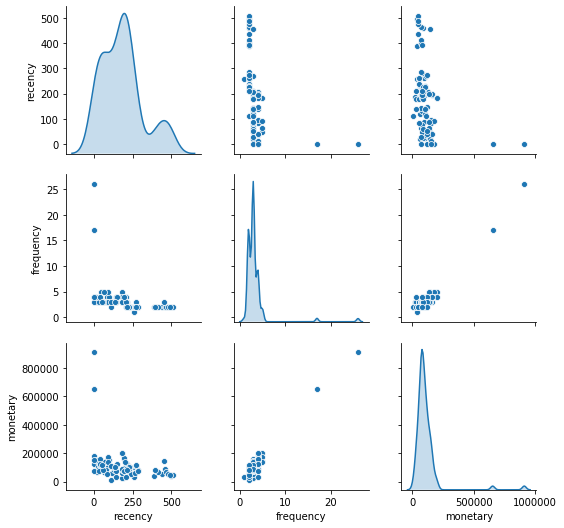

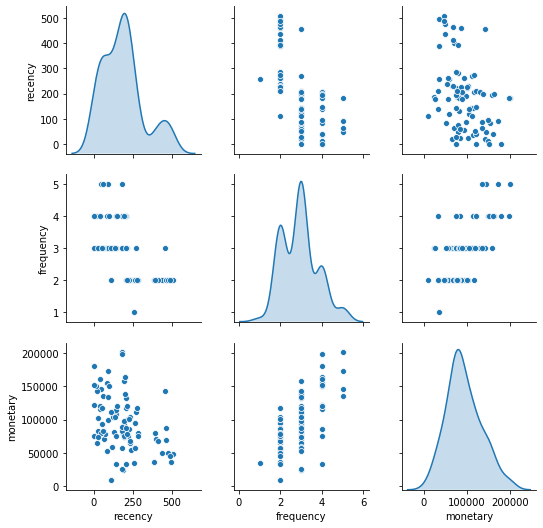

In [51]:
sns.pairplot(data_rfm, diag_kind ='kde')
plt.show()
#Exclude outliers to focus others
sns.pairplot(data_rfm[data_rfm.frequency < 10], diag_kind ='kde')
plt.show()

Credit goes to: https://www.kaggle.com/sonnihs/sales-analysis-customer-behaviors

In [52]:
data_rfm.corr()

,recency,frequency,monetary
recency,1.000000,-0.362560,-0.323961
frequency,-0.362560,1.000000,0.960853
monetary,-0.323961,0.960853,1.000000


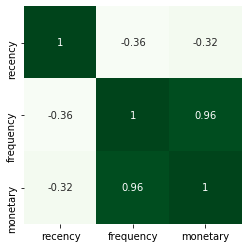

In [53]:
# correlation
sns.heatmap(
    data_rfm.corr(), 
    annot=True, 
    cbar=False,
    cmap='Greens',
    square=True
    )
plt.show()

__Scale from 1-10__

In [54]:
q = data_rfm.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
print(q)
q = q.to_dict()
print(q)

     recency  frequency    monetary
0.1     25.1        2.0   48207.819
0.2     54.8        2.0   64640.032
0.3     92.1        2.0   74725.237
0.4    144.4        3.0   79323.366
0.5    185.0        3.0   86522.610
0.6    196.6        3.0  100479.962
0.7    218.0        3.0  115037.456
0.8    257.8        4.0  133744.524
0.9    399.2        4.0  153753.615
{'recency': {0.1: 25.099999999999998, 0.2: 54.8, 0.3: 92.10000000000001, 0.4: 144.4, 0.5: 185.0, 0.6: 196.6, 0.7: 217.99999999999994, 0.8: 257.8, 0.9: 399.20000000000005}, 'frequency': {0.1: 2.0, 0.2: 2.0, 0.3: 2.0, 0.4: 3.0, 0.5: 3.0, 0.6: 3.0, 0.7: 3.0, 0.8: 4.0, 0.9: 4.0}, 'monetary': {0.1: 48207.818999999996, 0.2: 64640.03200000001, 0.3: 74725.237, 0.4: 79323.366, 0.5: 86522.60999999999, 0.6: 100479.962, 0.7: 115037.45599999998, 0.8: 133744.524, 0.9: 153753.61500000005}}


In [55]:
'''
Credit goes to: https://www.kaggle.com/sarahm/customer-segmentation-using-rfm-analysis/notebook
Thanks!
'''

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.1]:
        return 10
    elif x <= d[p][0.2]:
        return 9
    elif x <= d[p][0.3]:
        return 8
    elif x <= d[p][0.4]: 
        return 7
    elif x <= d[p][0.5]: 
        return 6
    elif x <= d[p][0.6]: 
        return 5
    elif x <= d[p][0.7]: 
        return 4
    elif x <= d[p][0.8]: 
        return 3
    elif x <= d[p][0.9]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.1]:
        return 1
    elif x <= d[p][0.2]:
        return 2
    elif x <= d[p][0.3]:
        return 3
    elif x <= d[p][0.4]: 
        return 4
    elif x <= d[p][0.5]: 
        return 5
    elif x <= d[p][0.6]: 
        return 6
    elif x <= d[p][0.7]: 
        return 7
    elif x <= d[p][0.8]: 
        return 8
    elif x <= d[p][0.9]: 
        return 9
    else:
        return 10
    
data_rfm['R_Quartile'] = data_rfm['recency'].apply(RScore, args=('recency',q,))
data_rfm['F_Quartile'] = data_rfm['frequency'].apply(FMScore, args=('frequency',q,))
data_rfm['M_Quartile'] = data_rfm['monetary'].apply(FMScore, args=('monetary',q,))

data_rfm

,customername,recency,frequency,monetary,R_Quartile,F_Quartile,M_Quartile
0,"AV Stores, Co.",195,3,157807.81,5,4,10
1,Alpha Cognac,64,3,70488.44,8,4,3
2,Amica Models & Co.,264,2,94117.26,2,1,6
3,"Anna's Decorations, Ltd",83,4,153996.13,8,8,10
4,Atelier graphique,187,3,24179.96,5,4,1
5,"Australian Collectables, Ltd",22,3,64591.46,10,4,2
6,"Australian Collectors, Co.",183,5,200995.41,6,10,10
7,"Australian Gift Network, Co",118,3,59469.12,7,4,2
8,Auto Assoc. & Cie.,232,2,64834.32,3,1,3
9,Auto Canal Petit,54,3,93170.66,9,4,6


__Customer Segments KMeans__

__K - Means Clustering__

K-Means clustering is an unsupervised learning method. It means that there is no response variable Y of the observations. We don't know their classes,  therefore the method aims to try to cluster the observations according to the distances between them without any training step. 

* Firstly we specify the number of clusters k by the data scientist.

* Next, the centroid of the clusters are selected by randomly.

* For each observation, the distance of the centroids are measured and the minimum one is assigned to their centroid. Generally, the distance is measured by using Euclidean distance. This step is called as cluster assignment.


# \begin{equation}
    d_{euc}(x,y)=\sqrt{\sum_{i=1}^{n}(x_i-y_i)^2}
\end{equation}

* After the centroid is assigned to each observation, for each cluster the new mean values computed, so the centroids are updated. 
* Then reassign each point according to new centroids. So that the observations are clustered more accurately by checking again.
* The steps which are update the cluster centroids and assign the cluster assignment are iterated until the cluster assignments changing which means convergence is achieved. By default in Python iteration is 10.

In [56]:
from IPython.display import Image
Image(url='K-means_convergence.gif')  

__K-means Applications__
- Vector quantization
- Cluster analysis
- Feature learning

Real-world applications basically:
- Customer, market segmentation
- Computer vision
- Search engines

This is the graph of the average distance from the centers of the observations to the number of varying clusters.


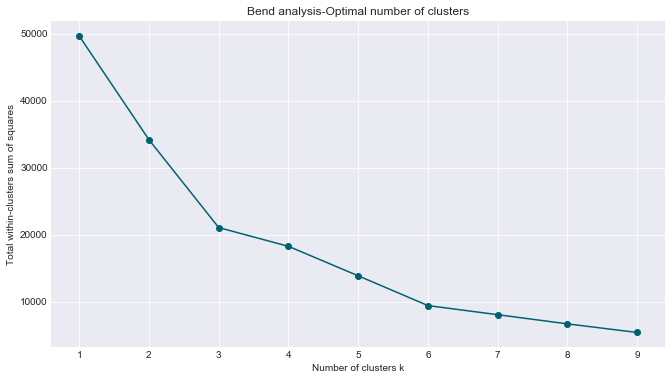

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

k=3
kmeans = KMeans(n_clusters=k)
scaler = StandardScaler()
df_seg_crfm = data_rfm[['customername','recency','frequency','monetary']]
df_seg_rfm = data_rfm[['recency','frequency','monetary']]

l=[]
L=range(1,10)
for k in L:
    km = KMeans(n_clusters=k)
    km.fit(df_seg_rfm)
    l.append(sum(np.min(cdist(df_seg_rfm, km.cluster_centers_, 'euclidean'), axis=1)) / df_seg_rfm.shape[0])
 
plt.style.use('seaborn-darkgrid')   
plt.figure(figsize=(11,6))
plt.plot(L,l, color = '#00616f', marker = 'o')
plt.xlabel('Number of clusters k')
plt.ylabel('Total within-clusters sum of squares')
plt.title('Bend analysis-Optimal number of clusters')
print("This is the graph of the average distance from the centers of the observations to the number of varying clusters.")
plt.show()
#The classical methods for distance measures is Euclidean used

In [58]:
df_seg_rfm.head()

,recency,frequency,monetary
0,195,3,157807.81
1,64,3,70488.44
2,264,2,94117.26
3,83,4,153996.13
4,187,3,24179.96
